<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/Opt_T6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#steepest descent.
def get_alpha_k(x,d,H):
    top=np.linalg.norm(d)
    bottom=np.dot(d,np.dot(H,d))
    return (top/bottom)
def Steepest_descent(x_0,f,grad_f,Hessian_f,tol_grad=10**(-6),max_iter=10**5,pr="False"):
    alpha_k=get_alpha_k(x=x_0,d=grad_f(x_0),H=Hessian_f(x_0))
    x_1=x_0-alpha_k*np.array(grad_f(x_0))#First iteration
    if(pr=='True'):
        print("Initial approximation: ", x_0)
        F=[f(x_0)]
        G=[np.linalg.norm(grad_f(x_0))]
    x_0=x_1
    k=1
    norm_grad=np.linalg.norm(grad_f(x_1))
    #Cycle
    while(norm_grad>tol_grad and k<max_iter):#stop criteria
        k+=1
        alpha_k=get_alpha_k(x=x_0,d=grad_f(x_0),H=Hessian_f(x_0))
        x_1=x_0-alpha_k*np.array(grad_f(x_0))
        x_0=x_1
        norm_grad=np.linalg.norm(grad_f(x_1))
        if(pr=='True'):
            F.append(f(x_0))
            G.append(np.linalg.norm(grad_f(x_0)))
    if(k==max_iter):
        print("There wasnt convergence after "+str(max_iter)+" iterations.\nLast iteration: "+str(x_1))
    else:
        if(pr=='True'):
            if(len(F)>1000):
                L=200
            else:
                L=0
            plt.plot(range(L+1,len(F)),F[L:-1])#Posterior convergence
            #Ploteo los ultimos para ver qué forma tiene la curva en las ultimas iteraciones, pues inicia decreciendo muy rápido.
            plt.title("k vs. F(X_k)")   
            plt.show()         
            plt.plot(range(L+1,len(G)),G[L:-1])
            plt.title("k vs. ||g(X_k)||")   
            plt.show()         
        print("iterations: ",k)
        return (x_1)

In [ ]:
def Rosembrok(X):#X es un vector.
    suma=0
    for i in range(len(X)-1):#Se puede otpimizar.
        suma+=100*((X[i+1]-X[i]**2)**2)+(1-X[i])**2
    return (suma)
def Rosembrok_grad(X):
    D=[]
    D.append(-400*(X[0]*(X[1]-X[0]**2))-2*(1-X[0]))
    for i in range(1,len(X)-1):
        D.append(-400*(X[i]*(X[i+1]-X[i]**2))+200*(X[i]-X[i-1]**2)-2*(1-X[i]))
    D.append(200*(X[-1]-X[-2]**2))
    return D
def Rosembrok_Hessian(X):
    M=[]
    #Renglon 1
    D=np.zeros(len(X))
    D[0]=(-400*(X[1]-X[0]**2)+800*(X[0]**2)+2)
    D[1]=-400*(X[1])
    M.append(D)
    #Renglon 2<i<n
    for i in range(1,len(X)-1):
        D=np.zeros(len(X))
        D[i]=(-400*(X[i+1]-X[i]**2)+800*(X[i]**2)+202)
        D[i-1]=-400*X[i-1]
        D[i+1]=-400*X[i]
        M.append(D)
    #Renglon n
    D=np.zeros(len(X))
    D[-2]=-400*X[-2]
    D[-1]=200
    M.append(D)
    return M

Initial approximation:  [-1.2, 1]


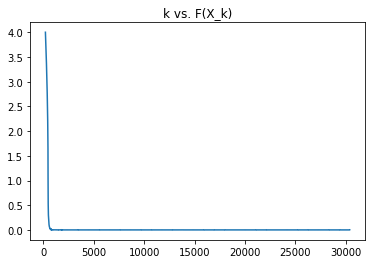

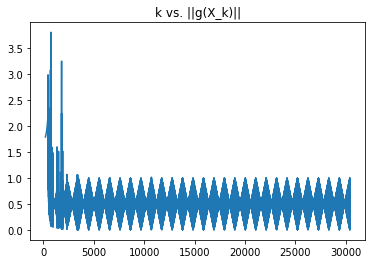

iterations:  30400
local minimum approximation:  [0.99997841 0.99995692]
f-Value:  4.673490508027672e-10


In [ ]:
n=2
x_0=[]
if(n>2):
    x_0.append(-1.2)
for i in range(1,n-2):
    x_0.append(1)
x_0.append(-1.2)
x_0.append(1)
loc_min=Steepest_descent(x_0=x_0,f=Rosembrok,grad_f=Rosembrok_grad,Hessian_f=Rosembrok_Hessian,pr='True',tol_grad=10**(-4))
print("local minimum approximation: ",(loc_min))
print("f-Value: ",Rosembrok(loc_min))#Error